<a href="https://colab.research.google.com/github/sifo-arch/RIC/blob/main/first_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import tensorflow
import tensorflow as tf
# print the version of tensorflow
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


In [2]:
# download the mnist dataset
mnist = tf.keras.datasets.mnist
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print the size of the dataset
print(f"Size of the x_train set: {x_train.shape}")
print(f"Size of the y_train set: {y_train.shape}")
print(f"Size of the x_test set: {x_test.shape}")
print(f"Size of the y_test set: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Size of the x_train set: (60000, 28, 28)
Size of the y_train set: (60000,)
Size of the x_test set: (10000, 28, 28)
Size of the y_test set: (10000,)


Index of the image = 21625


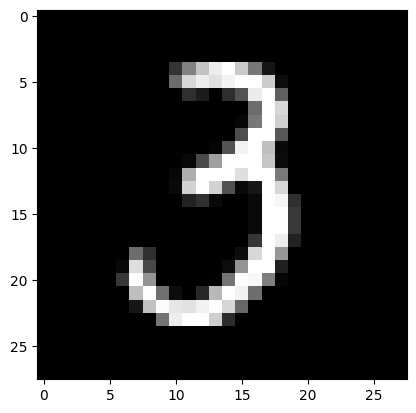

The number corresponding to the image is: 3


In [3]:
import matplotlib.pyplot as plt
from random import randint

index = randint(0, 59999)

image = x_train[index, :, :]

def show_img(img):
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.show()

# print the index of the image
print(f"Index of the image = {index}")
# display the image
show_img(image)
# print the label of the image
print(f"The number corresponding to the image is: {y_train[index]}")

In [4]:
# normalizing the training/test x set
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# building a neural network (MLP) model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer
    tf.keras.layers.Dense(units=128, activation='relu'), # one hidden layer consists of 128 neurons
    tf.keras.layers.Dropout(0.2), # Dropout is a regularization technique used to prevent overfitting
    tf.keras.layers.Dense(10) # raw output 'aka logits' (not normalized yet with a normalization function like softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
example_img = x_train[0:1] # shape should be (x, 28, 28), in our case x=1 (only one example)
# performing forward propagation, then converting the result to a numpy array
forward_propagation_output = model(example_img).numpy()
# print the results
forward_propagation_output

array([[-0.92579305, -0.4632674 ,  0.8310051 , -0.32468104,  0.11841723,
         0.421557  ,  0.4094279 ,  1.374718  , -0.7871796 ,  0.36287326]],
      dtype=float32)

In [7]:
# The tf.nn.softmax function converts these logits to probabilities for each class
# then convert the result to a numpy array
tf.nn.softmax(logits=forward_propagation_output).numpy()

array([[0.0282078 , 0.04479623, 0.16343191, 0.05145514, 0.08014269,
        0.10852151, 0.10721319, 0.2814935 , 0.03240173, 0.10233634]],
      dtype=float32)

# Note
It is possible to bake the tf.nn.softmax function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

In [8]:
# define a loss function for training
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
# calculate the loss, then convert the result to a numpy scalar
loss_function(y_train[0:1], forward_propagation_output).numpy()

np.float32(2.220807)

In [10]:
# configure and compile the model
model.compile(
    optimizer='adam',
    loss=loss_function,
    metrics=['accuracy']
)

In [13]:
# train the model, i.e. adjust model parameters (weights) and minimize the loss
model.fit(x_train, y_train, batch_size=256, epochs=15)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0576
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9823 - loss: 0.0561
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0512
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.0485
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0467
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0418
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0397
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0378
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0381
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0331
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0316
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [20]:
# Evaluate the model performance using the test set
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9809 - loss: 0.0680


[0.06797046214342117, 0.98089998960495]

In [22]:
# If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [28]:
# The probability model outputs
probability_model(x_train[index:index+1]).numpy() # notice that output in index=3 (starting from 0) is 0.99 which means this datapoint is the digit 3

array([[1.9260651e-09, 1.4938347e-08, 4.2323720e-08, 9.9998903e-01,
        1.2350496e-12, 1.1526068e-06, 4.5289900e-14, 1.6003306e-10,
        2.6263601e-07, 9.5109299e-06]], dtype=float32)